**Chapter 4 – Training Linear Models**

# Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Logistic regression

Saving figure logistic_function_plot


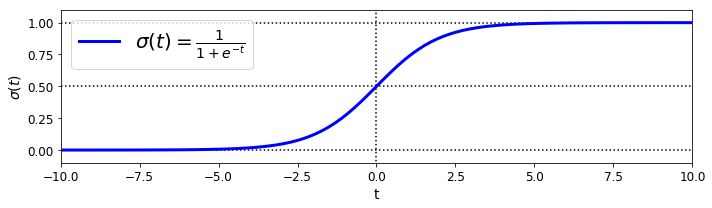

In [2]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(10, 3))
plt.plot([-10, 10], [0, 0], "k:")   #lignes pointillés
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k:")  #lignes pointillés
plt.plot(t, sig, "b-", linewidth=3, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.ylabel("$\sigma(t)$")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1,1.1])
save_fig("logistic_function_plot")
plt.show()

In [3]:
def find_miss_score(decision_boundary):
    for i in range(len(X[Y==0])):
        if (X[Y==0][i]>=decision_boundary):
            print (X[Y==0][i],"Y ==0")
    for i in range(len(X[Y==1])):
        if (X[Y==1][i]<=decision_boundary):
            print (X[Y==1][i],"Y ==1")

predict_proba on 0.2, 2.3 , 1.6: 
[[0.97583795 0.02416205]
 [0.14196538 0.85803462]
 [0.50836513 0.49163487]]
decision_boundary : [1.61561562]
score :  0.96
[1.8] Y ==0
[1.7] Y ==0
[1.5] Y ==1
[1.6] Y ==1
[1.5] Y ==1
[1.4] Y ==1
find miss score at :  None
Saving figure logistic_regression_plot


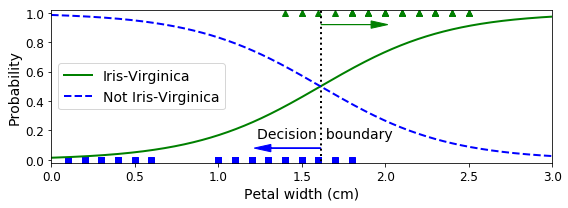

In [4]:
from sklearn import datasets
iris = datasets.load_iris()      #print(list(iris.keys()))           #print(iris.DESCR)                   #print(type(iris))

X = iris["data"][:, 3:]  # petal width
Y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0


from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=2,multi_class='ovr')
log_reg.fit(X, Y)


#test sur lui même, ici on a 
#X=1.5 1.4 1.6 1.5 et Y=1 (ne respecte pas totalement le decision boundary)
#X=1.8 1.7 et Y=0

print("predict_proba on 0.2, 2.3 , 1.6: ")
print(log_reg.predict_proba([[0.2],[2.3],[1.6]]))

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print ("decision_boundary :" , decision_boundary)
print("score : ",log_reg.score(X,Y))
print("find miss score at : ",find_miss_score(decision_boundary))


plt.figure(figsize=(8, 3))
plt.plot(X[Y==0], Y[Y==0], "bs")
plt.plot(X[Y==1], Y[Y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

# WORDS ONLY

score :  0.8173076923076923
predict_proba on 37, 10, 64 to have EN: 
[0.27305053 0.12275017 0.50206009]
decision_boundary : [63.77663777]
[74] Y ==0
[42] Y ==1
[38] Y ==1
[25] Y ==1
[44] Y ==1
[10] Y ==1
[41] Y ==1
[39] Y ==1
[21] Y ==1
[61] Y ==1
[37] Y ==1
[13] Y ==1
[28] Y ==1
[28] Y ==1
[35] Y ==1
[35] Y ==1
[23] Y ==1
[27] Y ==1
[21] Y ==1
[24] Y ==1
[37] Y ==1
[34] Y ==1
[58] Y ==1
[16] Y ==1
[42] Y ==1
[49] Y ==1
[34] Y ==1
[21] Y ==1
[20] Y ==1
[51] Y ==1
[15] Y ==1
[15] Y ==1
[29] Y ==1
[21] Y ==1
[28] Y ==1
[10] Y ==1
[18] Y ==1
[18] Y ==1
Saving figure logistic_regression_plot


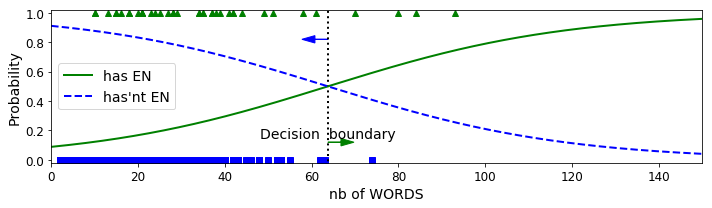

In [5]:
# WORDS ONLY
import pandas as pd
ROWS=208
X= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["nb Mots"],nrows=ROWS)
X= np.asarray(X, dtype=np.int).reshape(-1,1)
Y= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Entités Nommées (Nom propres)"],nrows=ROWS) #until row 151, so 150 values
Y= np.asarray(Y, dtype=np.int).reshape(-1,)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=17,multi_class='ovr')
log_reg.fit(X, Y)
print("score : ",log_reg.score(X,Y))

#Test
print("predict_proba on 37, 10, 64 to have EN: ")
print( log_reg.predict_proba([[37],[10],[64]])[:,1]  )

X_new = np.linspace(0, 640, 100000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print ("decision_boundary :" , decision_boundary)
find_miss_score(decision_boundary)


plt.figure(figsize=(10, 3))
plt.plot(X[Y==0],Y[Y==0],  "bs")
plt.plot(X[Y==1],Y[Y==1],  "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="has EN")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="has'nt EN")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.82, -3, 0,head_width=0.05, head_length=3, fc='b', ec='b')
plt.arrow(decision_boundary, 0.12, 3, 0, head_width=0.05, head_length=3, fc='g', ec='g')
plt.xlabel("nb of WORDS", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 150, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

#  QUOTES ONLY


score :  0.8146341463414634
predict_proba on 0, 1, 2, 3 : 
[0.16021145 0.4992392  0.7124032  0.89925324]
decision_boundary : [1.29241292]
[0] Y ==1
[0] Y ==1
[0] Y ==1
[1] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[1] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[1] Y ==1
[1] Y ==1
[1] Y ==1
[1] Y ==1
[0] Y ==1
[1] Y ==1
[1] Y ==1
[1] Y ==1
[1] Y ==1
[0] Y ==1
[0] Y ==1
[1] Y ==1
[0] Y ==1
[1] Y ==1
[1] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
Saving figure logistic_regression_plot


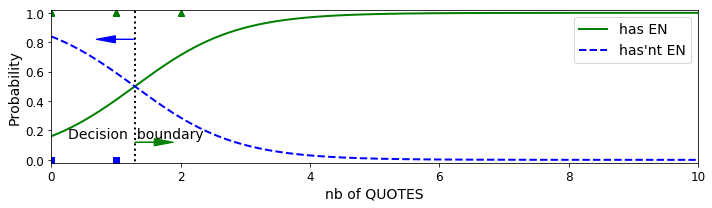

In [6]:
# QUOTES only
import pandas as pd
ROWS=205
X= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["nb Quotes"],nrows=ROWS)
X= np.asarray(X, dtype=np.int).reshape(-1,1)
Y= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Entités Nommées (Nom propres)"],nrows=ROWS) #until row 151, so 150 values
Y= np.asarray(Y, dtype=np.int).reshape(-1,)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=17,multi_class='ovr')
log_reg.fit(X, Y)
print("score : ",log_reg.score(X,Y))

#Test
print("predict_proba on 0, 1, 2, 3 : ")
print(log_reg.predict_proba([[0],[1.29],[2],[3]])[:,1]  )


X_new = np.linspace(0, 10, 100000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print ("decision_boundary :" , decision_boundary)
find_miss_score(decision_boundary)



plt.figure(figsize=(10, 3))
plt.plot(X[Y==0],Y[Y==0],  "bs")
plt.plot(X[Y==1],Y[Y==1],  "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="has EN")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="has'nt EN")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.82, -0.3, 0,head_width=0.05, head_length=0.3, fc='b', ec='b')
plt.arrow(decision_boundary, 0.12, 0.3, 0, head_width=0.05, head_length=0.3, fc='g', ec='g')
plt.xlabel("nb of QUOTES", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.axis([0, 10, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()


score :  0.7520661157024794
predict_proba on 0, 1, 2, 3 to have an EN :  
[0.14045396 0.18574051 0.24152583 1.        ]
decision_boundary : [5.43205432]
[15] Y ==0
[10] Y ==0
[9] Y ==0
[10] Y ==0
[13] Y ==0
[6] Y ==0
[6] Y ==0
[10] Y ==0
[6] Y ==0
[7] Y ==0
[6] Y ==0
[6] Y ==0
[7] Y ==0
[6] Y ==0
[6] Y ==0
[7] Y ==0
[18] Y ==0
[6] Y ==0
[8] Y ==0
[6] Y ==0
[8] Y ==0
[7] Y ==0
[7] Y ==0
[6] Y ==0
[6] Y ==0
[7] Y ==0
[6] Y ==0
[3] Y ==1
[2] Y ==1
[2] Y ==1
[1] Y ==1
[2] Y ==1
[3] Y ==1
[2] Y ==1
[2] Y ==1
[3] Y ==1
[1] Y ==1
[3] Y ==1
[3] Y ==1
[3] Y ==1
[2] Y ==1
[3] Y ==1
[4] Y ==1
[3] Y ==1
[5] Y ==1
[5] Y ==1
[1] Y ==1
[3] Y ==1
[4] Y ==1
[4] Y ==1
[2] Y ==1
[1] Y ==1
[3] Y ==1
[2] Y ==1
[2] Y ==1
[1] Y ==1
[1] Y ==1
[3] Y ==1
[2] Y ==1
[2] Y ==1
[4] Y ==1
[5] Y ==1
[2] Y ==1
[4] Y ==1
[3] Y ==1
[2] Y ==1
[3] Y ==1
[3] Y ==1
[2] Y ==1
[3] Y ==1
[5] Y ==1
[1] Y ==1
[5] Y ==1
[4] Y ==1
[2] Y ==1
[3] Y ==1
[1] Y ==1
[1] Y ==1
[1] Y ==1
[2] Y ==1
[3] Y ==1
[3] Y ==1
[3] Y ==1
[1] Y ==1
[

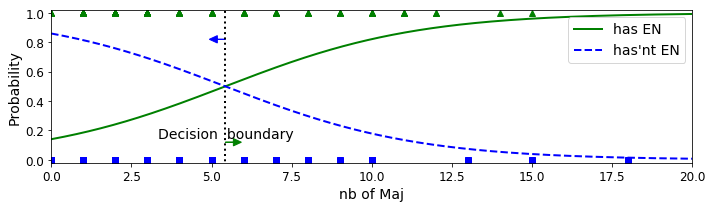

In [7]:
# MAJ only
import pandas as pd
ROWS=605
X= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["nb Maj"],nrows=ROWS)
X= np.asarray(X, dtype=np.int).reshape(-1,1)
Y= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Entités Nommées (Nom propres)"],nrows=ROWS) #until row 151, so 150 values
Y= np.asarray(Y, dtype=np.int).reshape(-1,)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=17,multi_class='ovr')
log_reg.fit(X, Y)
print("score : ",log_reg.score(X,Y))

#Test
print("predict_proba on 0, 1, 2, 3 to have an EN :  ")
print(log_reg.predict_proba([[0],[1],[2],[65]])[:,1]  )

X_new = np.linspace(0, 280, 100000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print ("decision_boundary :" , decision_boundary)
find_miss_score(decision_boundary)



plt.figure(figsize=(10, 3))
plt.plot(X[Y==0],Y[Y==0],  "bs")
plt.plot(X[Y==1],Y[Y==1],  "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="has EN")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="has'nt EN")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.82, -0.25, 0,head_width=0.05, head_length=0.25, fc='b', ec='b')
plt.arrow(decision_boundary, 0.12, 0.25, 0, head_width=0.05, head_length=0.25, fc='g', ec='g')
plt.xlabel("nb of Maj", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.axis([0, 20, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

score :  0.7520661157024794
predict_proba on 0, 1, 2, 3 to have an EN :  
[0.22302578 0.5177909  0.80067319 1.        ]
decision_boundary : [0.94640946]
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[2] Y ==0
[1] Y ==0
[2] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[1] Y ==0
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y ==1
[0] Y =

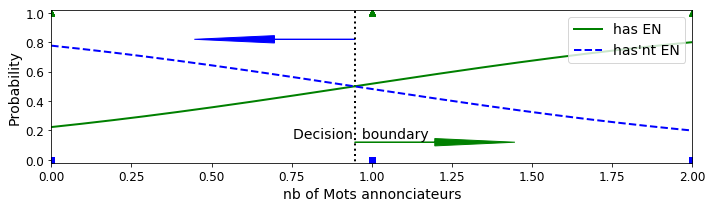

In [8]:
# Mots annonciateurs only
import pandas as pd
ROWS=605
X= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Mots annonciateurs"],nrows=ROWS)
X= np.asarray(X, dtype=np.int).reshape(-1,1)
Y= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Entités Nommées (Nom propres)"],nrows=ROWS) #until row 151, so 150 values
Y= np.asarray(Y, dtype=np.int).reshape(-1,)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=17,multi_class='ovr')
log_reg.fit(X, Y)
print("score : ",log_reg.score(X,Y))

#Test
print("predict_proba on 0, 1, 2, 3 to have an EN :  ")
print(log_reg.predict_proba([[0],[1],[2],[65]])[:,1]  )

X_new = np.linspace(0, 280, 100000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
print ("decision_boundary :" , decision_boundary)
find_miss_score(decision_boundary)
plt.figure(figsize=(10, 3))
plt.plot(X[Y==0],Y[Y==0],  "bs")
plt.plot(X[Y==1],Y[Y==1],  "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="has EN")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="has'nt EN")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.82, -0.25, 0,head_width=0.05, head_length=0.25, fc='b', ec='b')
plt.arrow(decision_boundary, 0.12, 0.25, 0, head_width=0.05, head_length=0.25, fc='g', ec='g')
plt.xlabel("nb of Mots annonciateurs", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
plt.axis([0, 2, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

# Maj + nb mots


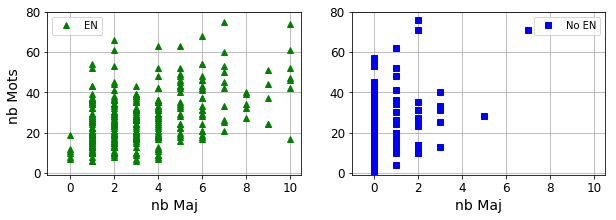

In [9]:
import pandas as pd
import numpy as np
ROWS=605
X= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["nb Mots","nb Maj"],nrows=ROWS)
X= np.asarray(X, dtype=np.int).reshape(-1,2)
Y= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Entités Nommées (FULL)"],nrows=ROWS) #until row 151, so 150 values
Y= np.asarray(Y, dtype=np.int).reshape(-1,)

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(X[Y==1][:,1],X[Y==1][:,0], "g^",label="EN")
plt.axis([-1,10.5,-1,80])
plt.xlabel("nb Maj", fontsize=14)
plt.ylabel("nb Mots ", fontsize=14)
plt.legend(loc="upper left")
plt.grid(True, which='both')

plt.subplot(122)
plt.plot(X[Y==0][:,1],X[Y==0][:,0], "bs",label="No EN")
plt.axis([-1,10.5,-1,80])
plt.legend(loc="upper right")
plt.xlabel("nb Maj", fontsize=14)
plt.grid(True, which='both')



score :  0.8297520661157025


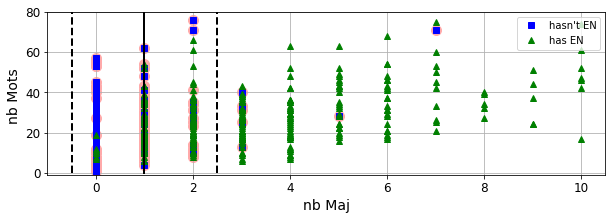

In [10]:
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(X,Y)
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin+0.5
    gutter_down = decision_boundary - margin-0.5
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 1], svs[:, 0], s=100,facecolor='#FFAAAA')
    plt.plot(decision_boundary,x0, "k-", linewidth=2)
    plt.plot(gutter_up,x0 ,"k--", linewidth=2)
    plt.plot(gutter_down,x0,  "k--", linewidth=2)
    
svm_clf.fit(X, Y)
print("score : ",svm_clf.score(X,Y))
plt.figure(figsize=(10, 3))
plt.plot(X[Y==0][:,1],X[Y==0][:,0], "bs",label="hasn't EN")
plt.plot(X[Y==1][:,1],X[Y==1][:,0], "g^",label="has EN")
plt.axis([-1,10.5,-1,80])
plt.grid(True, which='both')

plt.xlabel("nb Maj", fontsize=14)
plt.ylabel("nb Mots ", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plot_svc_decision_boundary(svm_clf, 0, 200)


In [ ]:
import pandas as pd
import numpy as np
ROWS=605
X= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["nb Quotes","nb Maj"],nrows=ROWS)
X= np.asarray(X, dtype=np.int).reshape(-1,2)
Y= pd.read_csv("tableur_606EN.csv", encoding = "ISO-8859-1",sep=";",usecols = ["Entités Nommées (FULL)"],nrows=ROWS) #until row 151, so 150 values
Y= np.asarray(Y, dtype=np.int).reshape(-1,)
from sklearn.svm import SVC
svm_clf = SVC(kernel="linear", C=1000)
svm_clf.fit(X,Y)

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    print(svs.shape)
    plt.scatter(svs[:, 1], svs[:, 0], s=100,facecolor='#FFAAAA')
    plt.plot(decision_boundary,x0, "k-", linewidth=2)
    plt.plot(gutter_up,x0 ,"k--", linewidth=2)
    plt.plot(gutter_down,x0,  "k--", linewidth=2)
    
svm_clf.fit(X, Y)
print("score : ",svm_clf.score(X,Y))
plt.figure(figsize=(10, 3))
plt.plot(X[Y==0][:,1],X[Y==0][:,0], "bs",label="hasn't EN")
plt.plot(X[Y==1][:,1],X[Y==1][:,0], "g^",label="has EN")
plt.axis([-0.2,10.5,-0.2,6])
plt.grid(True, which='both')

plt.xlabel("nb Maj", fontsize=14)
plt.ylabel("nb Quotes ", fontsize=14)
plt.legend(loc="upper right", fontsize=10)
plot_svc_decision_boundary(svm_clf, 0, 200)


In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()